In [1]:
import nltk

In [2]:
import pandas as pd
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt

from IPython.display import display

## looking at sms spam/ ham 

In [3]:
path = r".\SMSSpamCollection"
messages = pd.read_csv(path, sep="\t", names= ["label", "sms"])

In [4]:
messages.head()

,label,sms
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [5]:
messages.describe()

,label,sms
count,5572,5572
unique,2,5169
top,ham,"Sorry, I'll call later"
freq,4825,30


In [6]:
messages.groupby("label").describe()

sms                                                               
      count unique                                                top freq
label                                                                     
ham    4825   4516                             Sorry, I'll call later   30
spam    747    653  Please call our customer service representativ...    4

In [7]:
messages["sms"].head()

0    Go until jurong point, crazy.. Available only ...
1                        Ok lar... Joking wif u oni...
2    Free entry in 2 a wkly comp to win FA Cup fina...
3    U dun say so early hor... U c already then say...
4    Nah I don't think he goes to usf, he lives aro...
Name: sms, dtype: object

#### Visualize 

In [45]:
messages ["length"] = messages["sms"].apply(len )

In [46]:
messages.head()

,label,sms,length
0,ham,"Go until jurong point, crazy.. Available only ...",111
1,ham,Ok lar... Joking wif u oni...,29
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,ham,U dun say so early hor... U c already then say...,49
4,ham,"Nah I don't think he goes to usf, he lives aro...",61


In [83]:
sns.set_theme()

array([<AxesSubplot:title={'center':'ham'}>,
       <AxesSubplot:title={'center':'spam'}>], dtype=object)

<Figure size 1080x720 with 0 Axes>

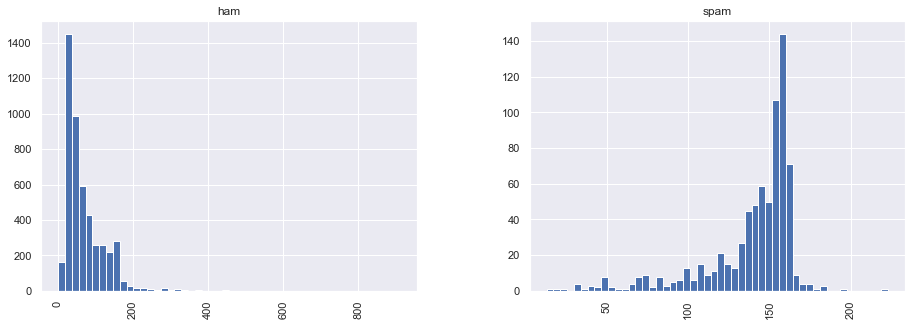

In [84]:
plt.figure(figsize=(15,10))
messages.hist(column = "length", by="label" , figsize=(15,5), bins = 50)

,length
label,
ham,71.482487
spam,138.670683


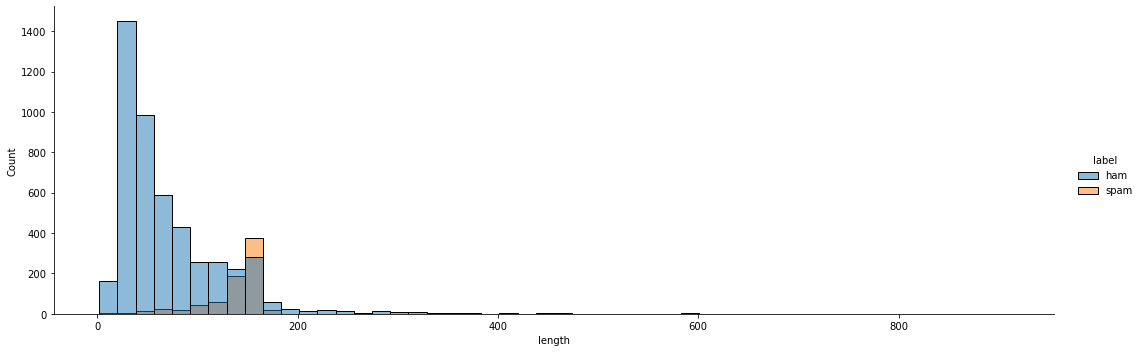

In [52]:
display (pd.DataFrame(messages.groupby("label")["length"].mean()) )


sns.displot(data = messages, x = "length", hue = "label", bins = 50, aspect= 3)
plt.show()

In [53]:
### so it seems that a Spam message is generally longer in length than ham

<AxesSubplot:xlabel='label', ylabel='length'>

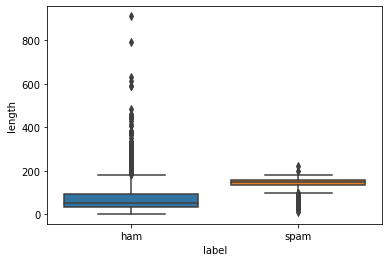

In [71]:
sns.boxplot(data = messages,x= "label" , y = "length")

In [85]:
### lots of outliers

# Other NLP processing 

##### punctation removal 

In [87]:
import string 

In [88]:
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [134]:
mystring = "Hello! my name is #Andrew. Notice: it is not David, or is it?"

In [93]:
"".join([x for x in mystring if x not in string.punctuation])

'Hello my name is Andrew Notice it is not David or is it'

### regex

In [96]:
import re

In [127]:
re.sub(r'[^A-Za-z\s]',"",mystring)

'Hello my name is Andrew Notice it is not David or is it'

## Tokenize text

In [129]:
from nltk.tokenize import TweetTokenizer
from nltk.tokenize import word_tokenize

In [135]:
print( TweetTokenizer().tokenize(mystring) ) 

['Hello', '!', 'my', 'name', 'is', '#Andrew', '.', 'Notice', ':', 'it', 'is', 'not', 'David', ',', 'or', 'is', 'it', '?']


# Stopwords

In [102]:
from nltk.corpus import stopwords

In [111]:
print( stopwords.words("english")) 

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

In [115]:
[word for word in mystring.split() if word.lower() not in stopwords.words("english")]

['Hello!', 'name', 'Andrew.', 'Notice:', 'David,', 'it?']

In [121]:
"".join([word for word in mystring.split() if word.lower() not in stopwords.words("english")])

'Hello!nameAndrew.Notice:David,it?'

### apply stopword removal to messages

In [125]:
messages["cleaned_sms"] = messages["sms"].apply(lambda x: "".join([word for word in x if x.lower() not in stopwords.words("english")]))

### Stemming 

In [136]:
from nltk.stem import WordNetLemmatizer

In [139]:
lemmatizer = WordNetLemmatizer()

In [145]:
lemmatizer.lemmatize("rocks")

'rock'